In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from keras.models import model_from_json

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [26]:
from tensorflow.keras.models import model_from_json


In [20]:
!pip3 install mlxtend

  Using cached https://files.pythonhosted.org/packages/16/e6/30e50ed9c053a1530c83149090e1f5fd9fccc8503dca2ecce1bb52f34de0/mlxtend-0.15.0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e2/a3/c42cd52e40527ba35aed53a988c485ffeddbae0722b8b756da82464baa73/pandas-0.24.1-cp35-cp35m-manylinux1_x86_64.whl
    98% |██████████████████████^C███████▎| 5.2MB 3.9MB/s eta 0:00:011

Operation cancelled by user


In [4]:
#y[8]

In [5]:
#y = np.asarray(y)

In [18]:
X[0]

array([[[0.49803922],
        [0.45882353],
        [0.45490196],
        ...,
        [0.60784314],
        [0.60784314],
        [0.60784314]],

       [[0.40392157],
        [0.30980392],
        [0.31372549],
        ...,
        [0.63137255],
        [0.62745098],
        [0.63137255]],

       [[0.45098039],
        [0.34117647],
        [0.32156863],
        ...,
        [0.62745098],
        [0.62352941],
        [0.62745098]],

       ...,

       [[0.62745098],
        [0.64705882],
        [0.67843137],
        ...,
        [0.32156863],
        [0.31764706],
        [0.11764706]],

       [[0.63529412],
        [0.6627451 ],
        [0.68627451],
        ...,
        [0.45490196],
        [0.16470588],
        [0.1372549 ]],

       [[0.64313725],
        [0.68627451],
        [0.69019608],
        ...,
        [0.34509804],
        [0.14117647],
        [0.13333333]]])

In [21]:
X = X/255.0 #normalize the data simply!

In [22]:
#add the first layer.....for the first one you have to mention the input_shape.
model = Sequential()

model.add(Conv2D(50, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.3))

#add the second layer...see no size is mentioned
model.add(Conv2D(50, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


#model.add(Dropout(0.3))
#add the third layer

#add the second layer...see no size is mentioned
# model.add(Conv2D(1024, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors...for using it in a dense layer later

model.add(Dense(100)) #the prefinal dense layer

model.add(Dense(3))#this is the final output layer
model.add(Activation('softmax'))


In [23]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
#train your nueral network
model.fit(X, y, batch_size=16, epochs=1, validation_split=0.2)

Train on 4695 samples, validate on 1174 samples
Epoch 1/1
4695/4695 [==============================] - 80s 17ms/step - loss: 0.0164 - acc: 0.9945 - val_loss: 0.0394 - val_acc: 0.9875


In [61]:

 
# serialize model to JSON
model_json = model.to_json()
with open("model_dnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_dnn.h5")
print("Saved model to disk")


Saved model to disk


In [62]:
X[0]

array([[[0.49803922],
        [0.45882353],
        [0.45490196],
        ...,
        [0.60784314],
        [0.60784314],
        [0.60784314]],

       [[0.40392157],
        [0.30980392],
        [0.31372549],
        ...,
        [0.63137255],
        [0.62745098],
        [0.63137255]],

       [[0.45098039],
        [0.34117647],
        [0.32156863],
        ...,
        [0.62745098],
        [0.62352941],
        [0.62745098]],

       ...,

       [[0.62745098],
        [0.64705882],
        [0.67843137],
        ...,
        [0.32156863],
        [0.31764706],
        [0.11764706]],

       [[0.63529412],
        [0.6627451 ],
        [0.68627451],
        ...,
        [0.45490196],
        [0.16470588],
        [0.1372549 ]],

       [[0.64313725],
        [0.68627451],
        [0.69019608],
        ...,
        [0.34509804],
        [0.14117647],
        [0.13333333]]])

In [63]:
X[0].shape

(100, 100, 1)

In [64]:
#checking our model with an example

In [65]:
x = cv2.imread("/home/pruthvirg/Desktop/Posturize/Dataset_0/test_set/peace/peacek1.jpg",cv2.IMREAD_GRAYSCALE)

In [77]:
x.shape

(197, 233)

In [66]:
new_array = cv2.resize(x, (100, 100))

In [67]:
new_array.shape

(100, 100)

In [68]:
X_test_array = np.array(new_array).reshape(100,100)

In [69]:
X_test_array.shape

(100, 100)

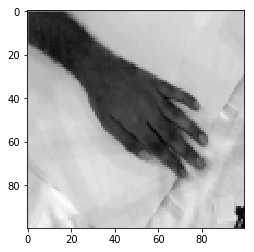

In [70]:
plt.imshow(X_test_array, cmap='gray')  # graph it
plt.show()  # display

In [71]:
X_test_array = np.array(X_test_array).reshape(100,100,1)
#predictions = model.predict(X_test_array)

In [72]:
X_test_array =np.array([X_test_array])

In [56]:
X_test_array.shape

(1, 100, 100, 1)

In [57]:
predictions = model.predict(X_test_array)# i calculated the prediction for the whole daataset!

In [58]:
print(predictions)

[[0. 0. 1.]]


In [1]:
#testing the model with actual examples.

In [75]:
path = '/home/pruthvirg/Desktop/dnn_'  # create path to dogs and cats
#class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

training_data = []

IMG_SIZE = 50

for i in range(4):  # iterate over each image per dogs and cats
        img_array = cv2.imread((path+str(i)+'.jpeg'),cv2.IMREAD_GRAYSCALE)  # convert to array
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
        training_data.append([new_array, 0])  # add this to our training_data


In [76]:
X_test = []
y_test = []

for features,label in training_data:
    X_test.append(features)
    y_test.append(label)

In [77]:
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [78]:
predictions = model.predict(X_test/255.0)

In [79]:
predictions

array([[5.3825320e-13, 9.3280417e-01, 2.7556942e-05, 6.7168236e-02],
       [2.4308794e-19, 4.7902631e-06, 2.8333636e-08, 9.9999523e-01],
       [1.8569988e-01, 4.7152601e-02, 5.3465098e-01, 2.3249653e-01],
       [9.5867550e-01, 1.4241403e-03, 3.9896339e-02, 4.0305922e-06]],
      dtype=float32)

In [61]:
 
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# evaluate loaded model on test data


Saved model to disk


In [28]:
json_file = open('model_dnn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [7]:
ls

angle_straight_bool.ipynb          ecg_bash_final.sh*
angle_straight_bool.py             ecg_final.py
aruco/                             ecg_marker_final_image.jpg
aruconew/                          generate_data.py
ArucoV2/                           hand_image_cut.py
back_straight_bool.ipynb           json_for_ecg.txt
back_straight_bool.py              main.py
bmi_final.py                       marker_bash_for_ecg.sh*
bmi_fluke.py                       marker_bash.sh*
bmi_openpose_bash.sh*              marker_code.py
bool_if_greater_than_threshold.py  marker_final_image.jpg
bp_1.0.py                          marker_for_ecg.py
bp_final.py                        model_dnn.h5
cnn_train.py                       model_dnn.json
Dataset/                           openpose_bash_ecg.sh*
Dataset_0/                         openpose_bash.sh*
Dataset_1/                         sample_analogread.py
Dataset_2/                         seg_image.png
deeplab_bash.sh*                   sensors_bash.sh*


In [73]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#score = loaded_model.evaluate(X, Y, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [54]:
X[0]

array([[[0.49803922],
        [0.45882353],
        [0.45490196],
        ...,
        [0.60784314],
        [0.60784314],
        [0.60784314]],

       [[0.40392157],
        [0.30980392],
        [0.31372549],
        ...,
        [0.63137255],
        [0.62745098],
        [0.63137255]],

       [[0.45098039],
        [0.34117647],
        [0.32156863],
        ...,
        [0.62745098],
        [0.62352941],
        [0.62745098]],

       ...,

       [[0.62745098],
        [0.64705882],
        [0.67843137],
        ...,
        [0.32156863],
        [0.31764706],
        [0.11764706]],

       [[0.63529412],
        [0.6627451 ],
        [0.68627451],
        ...,
        [0.45490196],
        [0.16470588],
        [0.1372549 ]],

       [[0.64313725],
        [0.68627451],
        [0.69019608],
        ...,
        [0.34509804],
        [0.14117647],
        [0.13333333]]])

In [74]:
predictions = loaded_model.predict(X_test_array)

In [75]:
predictions.shape

(1, 3)

In [76]:
predictions

array([[0.0000000e+00, 1.7354645e-34, 1.0000000e+00]], dtype=float32)

In [62]:
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
'''
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))
To view the graph of the model
'''

In [6]:
#